In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import skimage
import pickle
import time
import os
import copy
from tqdm import tqdm, tqdm_notebook
%load_ext autoreload
%autoreload 2

In [2]:
layers = ['layer1', 'layer2', 'layer3', 'layer4']
classifiers = []
average_scores = []

In [3]:
# Load data (deserialize)

for layer in layers:
    with open('classifiers-%s.pickle' % layer, 'rb') as handle:
        classifiers.append(pickle.load(handle))

In [4]:
for clfs in classifiers:
    s = 0
    for key, clf in clfs.items():
        s += clf[1]
    
    average_scores.append(s/len(clfs))

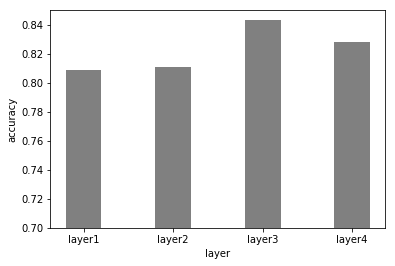

In [5]:
y_pos = np.arange(len(layers))
plt.bar(y_pos, average_scores, 0.4, align='center', color='grey')
plt.xticks(y_pos, layers)
plt.ylabel('accuracy')
plt.xlabel('layer')
plt.gca().set_ylim([0.7,0.85])
plt.savefig('figures/avg_linear_clf_accuracy.pdf', bbox_inches='tight')

In [6]:
[len(clfs) for clfs in classifiers]

[62, 73, 100, 90]

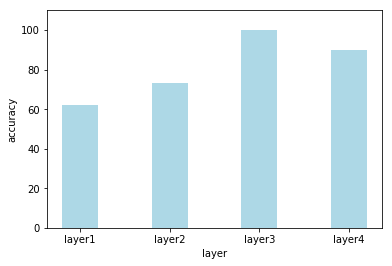

In [7]:
y_pos = np.arange(len(layers))
fig = plt.bar(y_pos, [len(clfs) for clfs in classifiers], 0.4, align='center', color='lightblue')
plt.xticks(y_pos, layers)
plt.ylabel('accuracy')
plt.xlabel('layer')
plt.gca().set_ylim([0,110])
plt.savefig('figures/num_linear_clfs.pdf', bbox_inches='tight')

In [8]:
dt_data = {}
dt_data_small = {}

for layer in layers:
    with open('data_decisiontree/%s.csv' % layer) as f:
        lines = (line for line in f if not line.startswith('#'))
        dt_data[layer] = np.loadtxt(lines, delimiter=',', skiprows=1)[:5]
    
    with open('data_decisiontree/%s_small.csv' % layer) as f:
        lines = (line for line in f if not line.startswith('#'))
        dt_data_small[layer] = np.loadtxt(lines, delimiter=',', skiprows=1)[:5]

In [9]:
def column(matrix, i):
    return [row[i] for row in matrix]

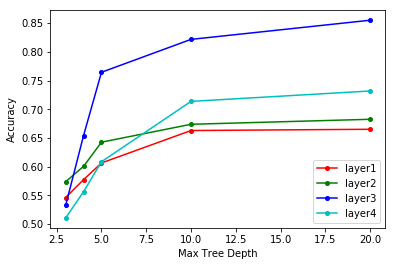

In [10]:
displays = ['ro-', 'go-', 'bo-', 'co-']
for idx, layer in enumerate(layers):
    plt.plot(column(dt_data[layer], 0), column(dt_data[layer], 2), displays[idx], label=layer, markersize=4)
plt.xlabel('Max Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('figures/natural_images.pdf', bbox_inches='tight')

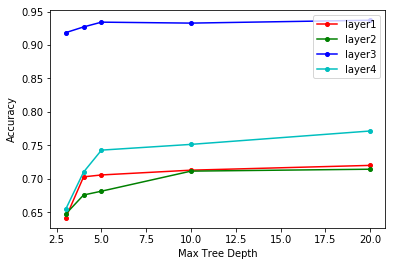

In [11]:
for idx, layer in enumerate(layers):
    plt.plot(column(dt_data_small[layer], 0), column(dt_data_small[layer], 2), displays[idx], label=layer, markersize=4)
plt.xlabel('Max Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('figures/mini_natural_images.pdf', bbox_inches='tight')

In [12]:
concepts = [key for key, value in classifiers[2].items()]
accuracies = [value[1] for key, value in classifiers[2].items()]
labels_frame = pd.read_csv('dataset/broden1_227/label.csv')
concept_names = [labels_frame.at[x-1, 'name'] for x in concepts]

In [13]:
clf_frame = pd.DataFrame({'concept': concept_names, 'accuracy': accuracies})

In [14]:
from itertools import cycle, islice
my_colors = list(islice(cycle(['red','salmon']), None, len(clf_frame)))

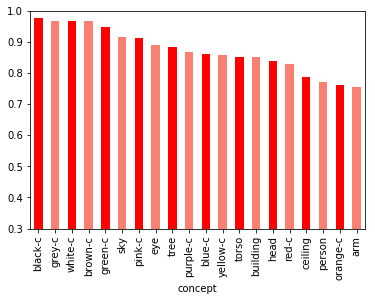

In [15]:
fig = clf_frame[:20].sort_values('accuracy', ascending=False)[['concept','accuracy']].plot.bar(x='concept', y='accuracy', legend=False, ylim=(0.3, 1), color=my_colors)

In [16]:
fig.get_figure().savefig('figures/accuracy_vs_concept.pdf', bbox_inches='tight')